## CPSC 340 Lecture 15: accompanying demo

Idea: show that overfitting corresponds to large values of the weights

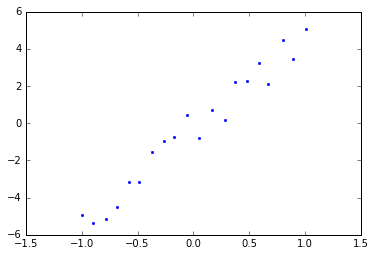

In [28]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import numpy.linalg as npla
%matplotlib inline

# generate some random data in 1-d
N = 20
X = np.linspace(-1,1,N)+npr.randn(N)*0.01
X=X[:,None]
y = npr.randn(N,1) + X*5

plt.plot(X,y,'.',markersize=5)

[ 91281453.5195599]


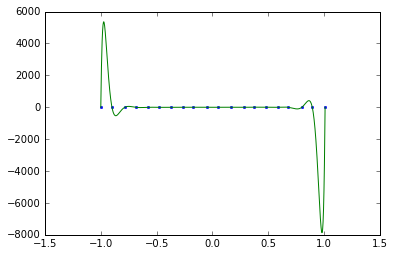

In [29]:
pf = PolynomialFeatures(N-1)
Z = pf.fit_transform(X)
w = npla.solve(Z.T @ Z, Z.T @ y)
grid = np.linspace(min(X),max(X),1000)[:,None]
grid_poly = pf.fit_transform(grid)

plt.plot(X,y,'.',markersize=5)
plt.plot(grid, grid_poly@w)
print(max(abs(w)))

[ 5.15864682]


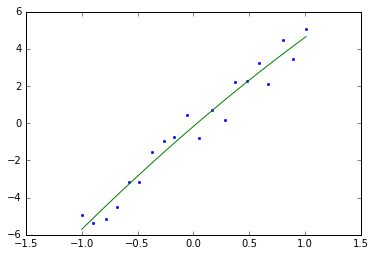

In [30]:
# solution 1: lower degree polynomial
pf = PolynomialFeatures(2)
Z = pf.fit_transform(X)

w = npla.solve(Z.T @ Z, Z.T @ y)

plt.plot(X,y,'.',markersize=5)
grid_poly = pf.fit_transform(grid)
plt.plot(grid, grid_poly@w)
print(max(abs(w)))

[ 3.54832467]


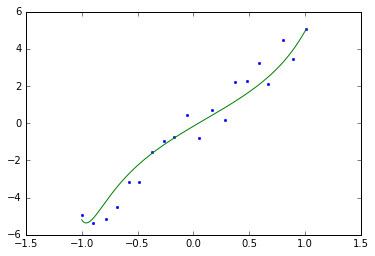

In [31]:
# solution 2: add regularization
pf = PolynomialFeatures(N-1)
Z = pf.fit_transform(X)

reg_strength = 1
w = npla.solve(Z.T @ Z + reg_strength*np.eye(N), Z.T @ y)

plt.plot(X,y,'.',markersize=5)
grid_poly = pf.fit_transform(grid)
plt.plot(grid, grid_poly@w)
print(max(abs(w)))

- Regularization helped! It's not always a magic bullet though. 
- The lower degree polynomial looks good too. But if the true relationship really was complicated? Then if we restricted the degree of the polynomial, we'd miss out on it. 
- We can add regularization to many models, not just least squares with a polynomial basis.